In [1]:
!pip install geopandas 
!pip install mapclassify
!pip install numpy
!pip install pandas

import geopandas as gpd
import mapclassify as mc
import numpy as np
import pandas as pd

In [ ]:
file_url = "https://github.com/DACSS-CSSmeths/Spatial-Exploring/raw/refs/heads/main/maps/countriesCIA.gpkg"
gdf = gpd.read_file(file_url)

print(gdf.columns)

<Axes: ylabel='Classifier'>

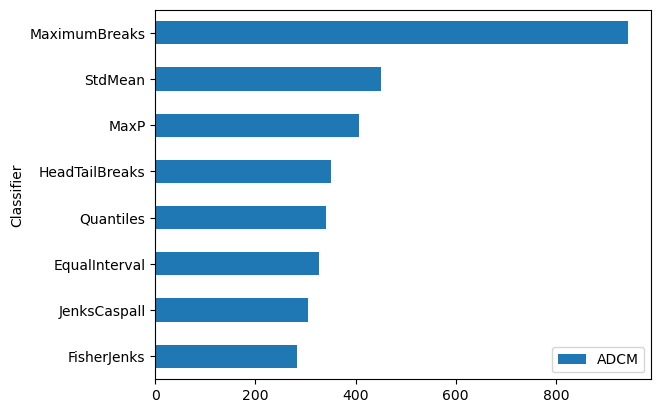

In [3]:
np.random.seed(12345)

K = 5

OBS = gdf["obesityAdults_rate"]

ei5 = mc.EqualInterval(OBS, k=K)
msd = mc.StdMean(OBS)
q5 = mc.Quantiles(OBS, k=K)
mb5 = mc.MaximumBreaks(OBS, k=K)
fj5 = mc.FisherJenks(OBS, k=K)
jc5 = mc.JenksCaspall(OBS, k=K)
mp5 = mc.MaxP(OBS, k=K)
ht = mc.HeadTailBreaks(OBS) 

classifiers = [ei5, msd, q5, mb5, fj5, jc5, mp5, ht]
fits = np.array([c.adcm for c in classifiers])

adcms = pd.DataFrame(fits, columns=["ADCM"])
adcms["Classifier"] = [c.name for c in classifiers]

adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [9]:
fj_obesity = mc.FisherJenks(gdf["obesityAdults_rate"], k=K)
gdf["obesity_bin"] = fj_obesity.yb  # Assign bin labels

fj_alcohol = mc.FisherJenks(gdf["Alcohol_LitersPerCap"], k=K)
gdf["alcohol_bin"] = fj_alcohol.yb  

fj_tobacco = mc.FisherJenks(gdf["TobaccoUse_perc"], k=K)
gdf["tobacco_bin"] = fj_tobacco.yb  

best_countries = gdf[(gdf["obesity_bin"] == 0) & 
                     (gdf["alcohol_bin"] == 0) & 
                     (gdf["tobacco_bin"] == 0)]

print("\n--- Best Performing Countries ---")
print(best_countries[["COUNTRY", "obesityAdults_rate", "Alcohol_LitersPerCap", "TobaccoUse_perc"]])


--- Best Performing Countries ---
        COUNTRY  obesityAdults_rate  Alcohol_LitersPerCap  TobaccoUse_perc
17        Benin                 9.6                  1.25              6.9
26         Chad                 6.1                  0.55              8.3
42      Eritrea                 5.0                  0.93              7.5
44     Ethiopia                 4.5                  1.16              5.1
49        Ghana                10.9                  1.59              3.5
83         Mali                 8.6                  0.60              8.3
86   Mauritania                12.7                  0.00             10.7
94        Niger                 5.5                  0.11              7.4
118     Senegal                 8.8                  0.25              6.9
128        Togo                 8.4                  1.40              6.8


In [15]:
output_file = "countriesCIA_updated.gpk

gdf.to_file('maps/gdf.gpkg',driver='GPKG',layer='cia')

DataSourceError: sqlite3_open(maps/gdf.gpkg) failed: unable to open database file